# Charting Stock Data

## Loading Stock Data from Data Directory

In [1]:
import os
import pandas as pd

data_dir = 'data_stocks'

stocks = {}
for file in sorted(os.listdir(data_dir)):
    if file.endswith(".csv"):
        s = file.split('.')[0]
        fname = os.path.join(data_dir, file)
        stocks[s] = pd.read_csv(fname, index_col=0)

In [2]:
stocks.keys()

dict_keys(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'F', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'])

## Charting

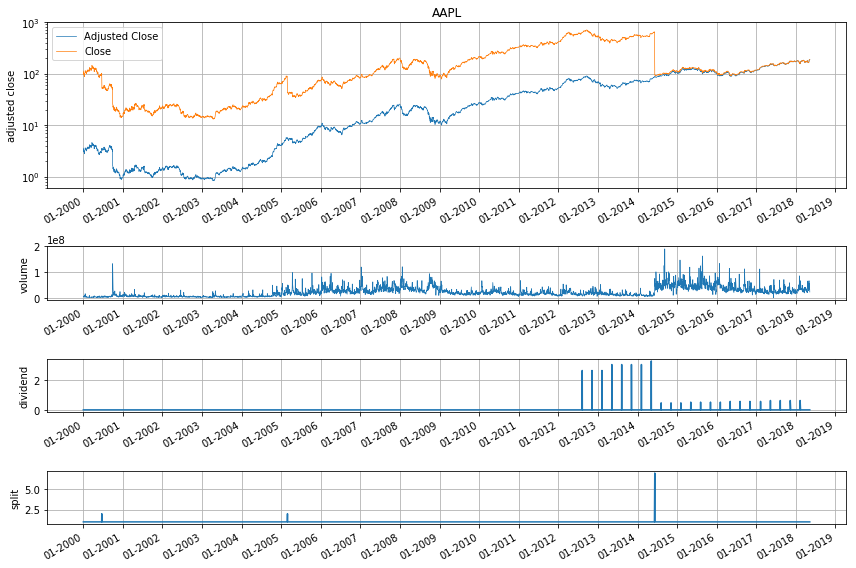

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def stock_chart(symbol):
    S = pd.DataFrame.from_dict(stocks[symbol])
    S.index = pd.to_datetime(S.index)
    plt.figure(figsize=(12,8))
    S['close'].plot(lw=0.7, logy=True)
    
    ax = plt.subplot(5,1,(1,2))
    S['adjusted close'].plot(ax=ax, lw=0.7, logy=True)
    S['close'].plot(ax=ax, lw=0.7, logy=True)
    plt.legend(['Adjusted Close','Close'])
    plt.title(symbol)
    plt.ylabel('adjusted close')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.grid()
    
    ax = plt.subplot(5,1,3)
    S['volume'].plot(lw=0.7)
    plt.ylabel('volume')
    plt.tight_layout()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.grid()
    
    ax = plt.subplot(5,1,4)
    S['dividend amount'].plot()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.ylabel('dividend')
    plt.grid()
    
    ax = plt.subplot(5,1,5)
    S['split coefficient'].plot()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    plt.ylabel('split')
    plt.grid()
    
    plt.tight_layout()
    
stock_chart('AAPL')

## Consolidating Adjusted Close Data

/Users/jeff/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


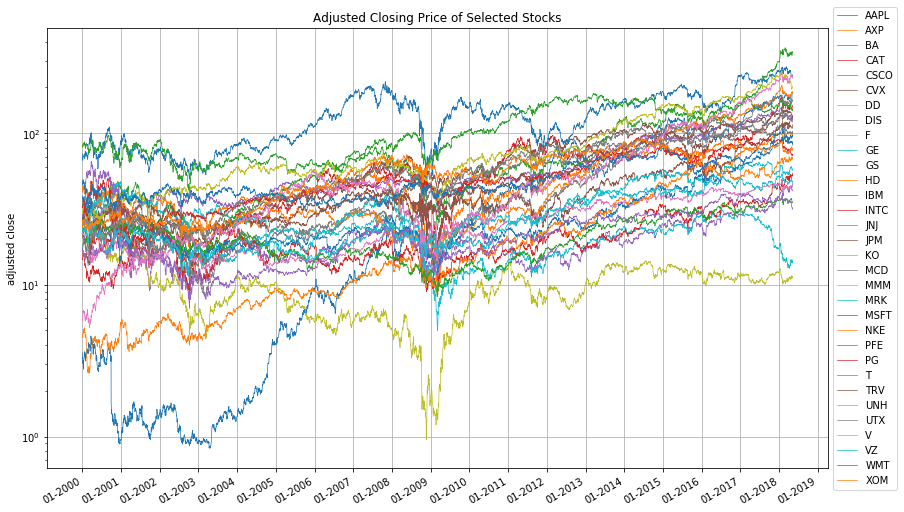

In [4]:
S = pd.concat([stocks[s]['adjusted close'] for s in stocks.keys()], axis=1, keys=stocks.keys())
S.index = pd.to_datetime(S.index)

fig, ax = plt.subplots(figsize=(14,9))
S.plot(ax=ax, lw=0.7, logy=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.ylabel('adjusted close')
plt.title('Adjusted Closing Price of Selected Stocks')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()

S.to_csv('Historical_Adjusted_Close.csv')